In [21]:
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.linear_model import Ridge
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [22]:
weather = pd.read_csv("weather.csv", index_col="DATE")
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1973-01-01,MOM00060230,"MENARA, MO",NaN,47,NaN,37.0
1973-01-02,MOM00060230,"MENARA, MO",NaN,49,61.0,NaN
1973-01-03,MOM00060230,"MENARA, MO",NaN,49,64.0,NaN
1973-01-04,MOM00060230,"MENARA, MO",NaN,49,66.0,39.0
1973-01-05,MOM00060230,"MENARA, MO",NaN,52,66.0,NaN
...,...,...,...,...,...,...
2024-04-26,MOM00060230,"MENARA, MO",0.0,65,79.0,NaN
2024-04-27,MOM00060230,"MENARA, MO",0.0,63,75.0,NaN
2024-04-28,MOM00060230,"MENARA, MO",0.0,61,71.0,57.0


In [3]:
weather.describe()

,PRCP,TAVG,TMAX,TMIN
count,14938.000000,18710.000000,14735.000000,11313.000000
mean,0.027099,68.118386,81.666169,57.193936
std,0.200518,11.651144,13.706940,9.999852
min,0.000000,39.000000,46.000000,29.000000
25%,0.000000,58.000000,71.000000,50.000000
50%,0.000000,67.000000,81.000000,57.000000
75%,0.000000,77.000000,92.000000,64.000000
max,10.240000,105.000000,121.000000,91.000000


In [4]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.201603
TAVG       0.000000
TMAX       0.212453
TMIN       0.395350
dtype: float64

In [5]:
weather.columns = weather.columns.str.lower()
weather.head()

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
1973-01-01,MOM00060230,"MENARA, MO",NaN,47,NaN,37.0
1973-01-02,MOM00060230,"MENARA, MO",NaN,49,61.0,NaN
1973-01-03,MOM00060230,"MENARA, MO",NaN,49,64.0,NaN
1973-01-04,MOM00060230,"MENARA, MO",NaN,49,66.0,39.0
1973-01-05,MOM00060230,"MENARA, MO",NaN,52,66.0,NaN


In [6]:
weather = weather.ffill()
weather = weather.dropna()
weather.head()

,station,name,prcp,tavg,tmax,tmin
DATE,,,,,,
1973-06-01,MOM00060230,"MENARA, MO",0.0,72,86.0,57.0
1973-06-02,MOM00060230,"MENARA, MO",0.0,75,88.0,61.0
1973-06-03,MOM00060230,"MENARA, MO",0.0,66,88.0,57.0
1973-06-04,MOM00060230,"MENARA, MO",0.0,65,75.0,57.0
1973-06-05,MOM00060230,"MENARA, MO",0.0,67,81.0,54.0


In [7]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

station    0.0
name       0.0
prcp       0.0
tavg       0.0
tmax       0.0
tmin       0.0
dtype: float64

In [8]:
weather.dtypes

station     object
name        object
prcp       float64
tavg         int64
tmax       float64
tmin       float64
dtype: object

In [9]:
#converting index from object to dateTime
weather.index = pd.to_datetime(weather.index)

In [10]:
#there is no gaps in our data
weather.index.year.value_counts().sort_index()

DATE
1973    214
1974    364
1975    364
1976    365
1977    365
1978    364
1979    362
1980    366
1981    363
1982    365
1983    365
1984    366
1985    364
1986    365
1987    362
1988    366
1989    365
1990    365
1991    361
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    364
2000    366
2001    365
2002    360
2003    364
2004    365
2005    365
2006    365
2007    365
2008    365
2009    365
2010    362
2011    365
2012    366
2013    365
2014    364
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    362
2022    365
2023    365
2024    117
Name: count, dtype: int64

In [11]:
weather["target"] = weather.shift(-1)["tmax"]
weather

,station,name,prcp,tavg,tmax,tmin,target
DATE,,,,,,,
1973-06-01,MOM00060230,"MENARA, MO",0.0,72,86.0,57.0,88.0
1973-06-02,MOM00060230,"MENARA, MO",0.0,75,88.0,61.0,88.0
1973-06-03,MOM00060230,"MENARA, MO",0.0,66,88.0,57.0,75.0
1973-06-04,MOM00060230,"MENARA, MO",0.0,65,75.0,57.0,81.0
1973-06-05,MOM00060230,"MENARA, MO",0.0,67,81.0,54.0,82.0
...,...,...,...,...,...,...,...
2024-04-26,MOM00060230,"MENARA, MO",0.0,65,79.0,53.0,75.0
2024-04-27,MOM00060230,"MENARA, MO",0.0,63,75.0,53.0,71.0
2024-04-28,MOM00060230,"MENARA, MO",0.0,61,71.0,57.0,71.0


In [19]:
weather = weather.dropna()
weather.apply(pd.isnull).sum()


station    0
name       0
prcp       0
tavg       0
tmax       0
tmin       0
target     0
dtype: int64

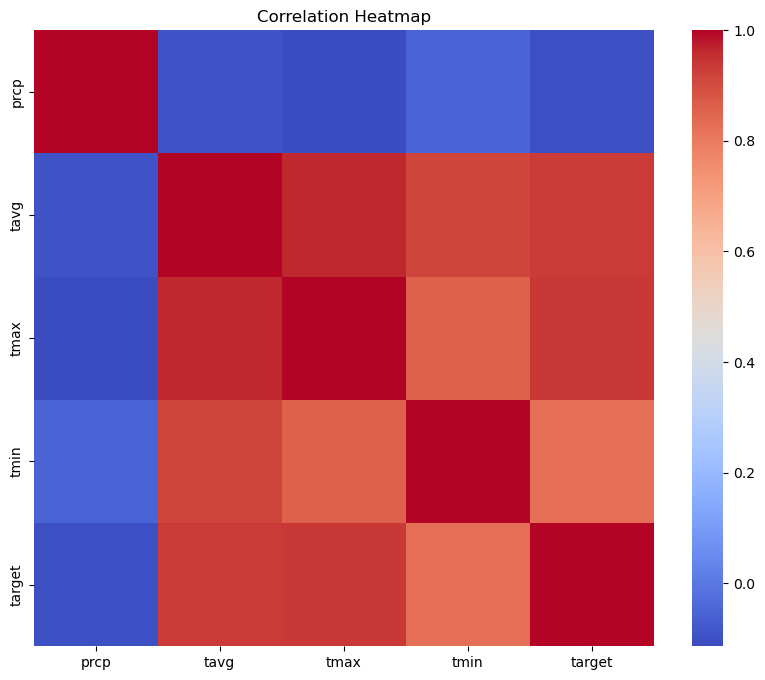

In [20]:
numeric_columns = ["prcp","tavg","tmax","tmin","target"]
corr_matrix = weather[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
rr = Ridge(alpha=.1)

In [22]:
predictors = ["prcp","tavg","tmax","tmin"]
predictors

['prcp', 'tavg', 'tmax', 'tmin']

In [23]:
# It iterates over the weather data starting from the specified index,
# splitting it into training and testing sets for each iteration.
# The model is trained on the training set and then used to make predictions
# on the testing set.
def backtest(weather, model, predictors, start=3650, step=90):
    all_predicitions = []
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predicitions.append(combined)
    return pd.concat(all_predicitions)

In [ ]:
minErr = float('inf')
optimalLambda = None    
for i in range(1, 100):
    t = i / 10
    r = Ridge(alpha=t)
    pred = backtest(weather, r, predictors)
    mae = mean_absolute_error(pred["actual"], pred["prediction"])
    if mae < minErr:
        minErr = mae
        optimalLambda = t

print("Optimal Lambda:", optimalLambda)

In [24]:
predictions = backtest(weather,rr,predictors)
predictions

,actual,prediction,diff
DATE,,,
1983-06-08,96.0,89.143303,6.856697
1983-06-09,96.0,94.856296,1.143704
1983-06-10,103.0,94.539011,8.460989
1983-06-11,103.0,101.873733,1.126267
1983-06-12,106.0,103.275337,2.724663
...,...,...,...
2024-04-25,79.0,81.462827,2.462827
2024-04-26,75.0,78.711596,3.711596
2024-04-27,71.0,75.458888,4.458888


In [26]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

3.2600044167418107